In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [2]:

# Load stock market data
stock_symbol = "TSLA"  # Replace with your desired stock symbol
data = yf.download(stock_symbol, start="2015-01-01", end="2025-01-01")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Calculate additional features
data['Moving_Avg_10'] = data['Close'].rolling(window=10).mean()
data['Moving_Avg_50'] = data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()

# Create the target variable: 1 if the price goes up, 0 if it goes down
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Drop rows with NaN values from moving averages
data = data.dropna()



[*********************100%***********************]  1 of 1 completed


In [3]:
# Prepare the features and target
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Moving_Avg_10', 'Moving_Avg_50', 'Daily_Return']]
y = data['Target']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [4]:
# Handle data imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [5]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate Random Forest Classifier
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)

print("Random Forest Results:")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_class_report)
print(f"ROC-AUC Score: {rf_roc_auc:.2f}")


Random Forest Results:
Confusion Matrix:
[[118 119]
 [118 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       237
           1       0.54      0.54      0.54       257

    accuracy                           0.52       494
   macro avg       0.52      0.52      0.52       494
weighted avg       0.52      0.52      0.52       494

ROC-AUC Score: 0.53


In [6]:
# Neural Network Model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network
history = nn_model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


# Evaluate Neural Network
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)
nn_probabilities = nn_model.predict(X_test)
nn_conf_matrix = confusion_matrix(y_test, nn_predictions)
nn_class_report = classification_report(y_test, nn_predictions)
nn_roc_auc = roc_auc_score(y_test, nn_probabilities)

print("\nNeural Network Results:")
print("Confusion Matrix:")
print(nn_conf_matrix)
print("\nClassification Report:")
print(nn_class_report)
print(f"ROC-AUC Score: {nn_roc_auc:.2f}")

Epoch 1/50


/opt/miniconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5239 - loss: 0.6931 - val_accuracy: 0.4879 - val_loss: 0.6937
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4669 - loss: 0.6963 - val_accuracy: 0.5202 - val_loss: 0.6925
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.5101 - loss: 0.6943 - val_accuracy: 0.5202 - val_loss: 0.6923
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4974 - loss: 0.6934 - val_accuracy: 0.5020 - val_loss: 0.6935
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4888 - loss: 0.6946 - val_accuracy: 0.4980 - val_loss: 0.6927
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.5105 - loss: 0.6926 - val_accuracy: 0.5182 - val_loss: 0.6923
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4801 - loss: 0.6939 - val_accuracy: 0.5263 - val_loss: 0.6922
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.5134 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.69

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step

Neural Network Results:
Confusion Matrix:
[[161  76]
 [175  82]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.68      0.56       237
           1       0.52      0.32      0.40       257

    accuracy                           0.49       494
   macro avg       0.50      0.50      0.48       494
weighted avg       0.50      0.49      0.48       494

ROC-AUC Score: 0.51


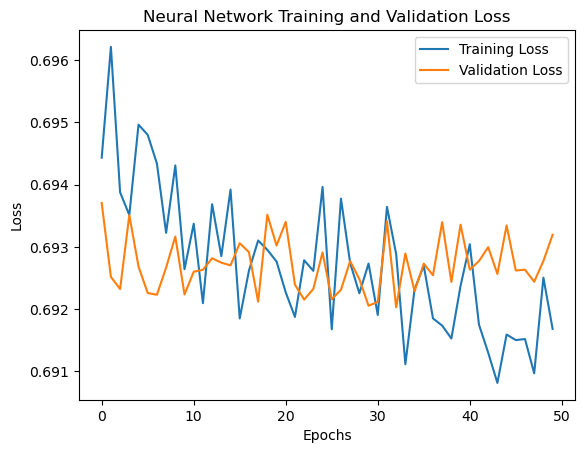

In [7]:


# Plot training vs validation loss for Neural Network
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
